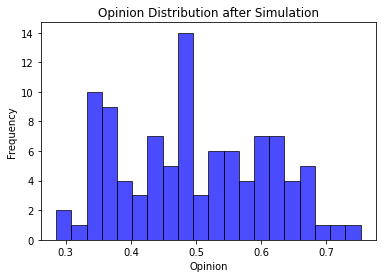

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def initialize_opinions(num_agents):
    return np.random.uniform(0, 1, num_agents)

def update_opinions(opinions, adjacency_matrix, epsilon):
    num_agents = len(opinions)
    updated_opinions = np.copy(opinions)

    for i in range(num_agents):
        neighbors = np.nonzero(adjacency_matrix[i])[0]
        if len(neighbors) > 0:
            average_opinion = np.mean(opinions[neighbors])
            updated_opinions[i] = (1 - epsilon) * opinions[i] + epsilon * average_opinion

    return updated_opinions

def run_simulation(num_agents, num_iterations, epsilon):
    # Create a random graph (you can use other graph structures based on your requirements)
    G = nx.erdos_renyi_graph(num_agents, 0.2)
    adjacency_matrix = nx.adjacency_matrix(G).toarray()

    # Initialize opinions randomly
    opinions = initialize_opinions(num_agents)

    # Run simulation
    for iteration in range(num_iterations):
        opinions = update_opinions(opinions, adjacency_matrix, epsilon)

    return opinions

def plot_opinions(opinions):
    plt.hist(opinions, bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel('Opinion')
    plt.ylabel('Frequency')
    plt.title('Opinion Distribution after Simulation')
    plt.show()

if __name__ == "__main__":
    num_agents = 100
    num_iterations = 10
    epsilon = 0.1

    final_opinions = run_simulation(num_agents, num_iterations, epsilon)
    plot_opinions(final_opinions)
